# Naive Bayes Classifier

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data.

Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems.

It uses the Bayes theorem of probability to predict the class.

Bayes Theorem of Probability:

P(A/B) = (P(B/A) * P(A)) / P(B)

P(A/B) : probability of event A knowing B has occurred. (Conditional Probability)

P(B/A) : probability of event B given event A.

In [1]:
import pandas as pd
import numpy as np

# Load datasets

In [3]:
train_data = pd.read_csv(r'C:\Users\AA\DataScience\datasets\titanic_train.csv')
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_data = pd.read_csv(r'C:\Users\AA\DataScience\datasets\titanic_test.csv')
test_data.tail()

PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C

In [5]:
#creating full dataset
titanic_df = pd.concat([train_data,test_data],ignore_index=True)
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
#dropping columns
titanic_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis ='columns',inplace = True)
titanic_df.tail()

Survived  Pclass     Sex   Age      Fare
1304       NaN       3    male   NaN    8.0500
1305       NaN       1  female  39.0  108.9000
1306       NaN       3    male  38.5    7.2500
1307       NaN       3    male   NaN    8.0500
1308       NaN       3    male   NaN   22.3583

In [7]:
titanic_df.isna().sum()

Survived    418
Pclass        0
Sex           0
Age         263
Fare          1
dtype: int64

In [8]:
titanic_df.Survived = titanic_df.Survived.fillna(titanic_df.Survived.mode())
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())
titanic_df.Fare = titanic_df.Fare.fillna(titanic_df.Fare.mean())

In [9]:
titanic_df.isna().any()

Survived     True
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [10]:
titanic_df=titanic_df.dropna()

In [11]:
titanic_df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [13]:
X_features=titanic_df.drop('Survived',axis='columns')
y_target=titanic_df.Survived

In [16]:
#text data ---> numeric data
dummies = pd.get_dummies(X_features.Sex)
dummies.head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [18]:
#add into df
X_features = pd.concat([X_features,dummies], axis = 'columns')
X_features.head()

Pclass     Sex   Age     Fare  female  male
0       3    male  22.0   7.2500       0     1
1       1  female  38.0  71.2833       1     0
2       3  female  26.0   7.9250       1     0
3       1  female  35.0  53.1000       1     0
4       3    male  35.0   8.0500       0     1

In [19]:
#drop sex and male column
X_features.drop(['Sex','male'],axis='columns', inplace=True)
X_features


Pclass        Age     Fare  female
0         3  22.000000   7.2500       0
1         1  38.000000  71.2833       1
2         3  26.000000   7.9250       1
3         1  35.000000  53.1000       1
4         3  35.000000   8.0500       0
..      ...        ...      ...     ...
886       2  27.000000  13.0000       0
887       1  19.000000  30.0000       1
888       3  29.881138  23.4500       1
889       1  26.000000  30.0000       0
890       3  32.000000   7.7500       0

[891 rows x 4 columns]

# Model building:

In [21]:
from sklearn.model_selection import train_test_split
X_features_train, X_features_test,y_target_train,y_target_test = train_test_split(X_features,y_target,test_size = 0.3,
                                                    stratify = y_target, random_state = 0)

In [22]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
model = GaussianNB()
model.fit(X_features_train,y_target_train)

GaussianNB()

In [24]:
y_pred=model.predict(X_features_test)
y_pred

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0.

In [26]:
model.predict([[2,25,10,1]])

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])

In [29]:
print('Actual Value:', y_target_test[6])
print('Predicted:',y_pred[6])

Actual Value: 0.0
Predicted: 0.0


# Model Evaluation:

In [30]:
model.score(X_features_test,y_target_test)

0.7985074626865671

In [31]:
from sklearn.metrics import(accuracy_score,confusion_matrix
                           ,ConfusionMatrixDisplay,f1_score)

y_pred = model.predict(X_features_test)
accuracy = accuracy_score(y_pred,y_target_test)
f1=f1_score(y_pred,y_target_test,average="weighted")

print("Accuracy:",accuracy)
print("F1 Score:",f1)

Accuracy: 0.7985074626865671
F1 Score: 0.7992958961639306


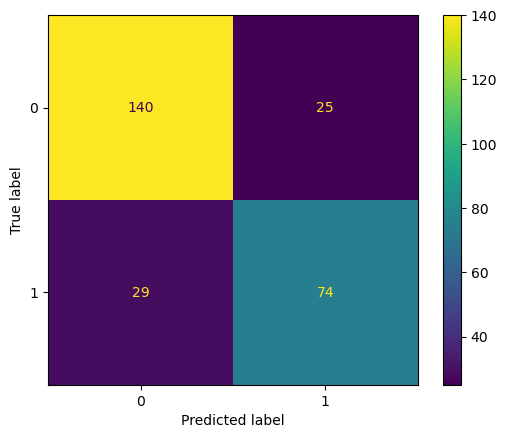

In [33]:
labels =[0,1]
conf_metrics = confusion_matrix(y_target_test,y_pred,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_metrics, display_labels=labels)
disp.plot()